In [1]:
!pip install -q tflite-model-maker

In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker import ImageClassifierDataLoader

import matplotlib.pyplot as plt

In [3]:
train_data = DataLoader.from_folder('/content/trainew')
test_data = DataLoader.from_folder('/content/test')
validation_data = DataLoader.from_folder('/content/val')

#train_data = ImageClassifierDataLoader.from_folder('/content/trainew')

INFO:tensorflow:Load image with size: 588, num_label: 3, labels: .ipynb_checkpoints, clean, dirty.
INFO:tensorflow:Load image with size: 130, num_label: 3, labels: .ipynb_checkpoints, clean, dirty.
INFO:tensorflow:Load image with size: 146, num_label: 3, labels: .ipynb_checkpoints, clean, dirty.


In [4]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(train_data.index_to_label[label.numpy()])
plt.show()

In [5]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs = 30, dropout_rate=0.5, learning_rate=0.001, shuffle=True)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


18/18 [==============================] - 19s 943ms/step - loss: 0.9038 - accuracy: 0.5903 - val_loss: 0.6223 - val_accuracy: 0.9375
Epoch 2/30
18/18 [==============================] - 16s 910ms/step - loss: 0.6088 - accuracy: 0.8351 - val_loss: 0.4835 - val_accuracy: 0.9688
Epoch 3/30
18/18 [==============================] - 16s 920ms/step - loss: 0.4877 - accuracy: 0.9444 - val_loss: 0.4131 - val_accuracy: 0.9688
Epoch 4/30
18/18 [==============================] - 16s 927ms/step - loss: 0.4401 - accuracy: 0.9531 - val_loss: 0.3810 - val_accuracy: 0.9766
Epoch 5/30
18/18 [==============================] - 16s 919ms/step - loss: 0.4032 - accuracy: 0.9670 - val_loss: 0.3604 - val_accuracy: 0.9922
Epoch 6/30
18/18 [==============================] - 16s 918ms/step - loss: 0.3929 - accuracy: 0.9670 - val_loss: 0.3515 - val_accuracy: 0.9922
Epoch 7/30
18/18 [==============================] - 16s 917ms/step - loss: 0.3840 - accuracy: 0.9705 - val_loss: 0.3478 - val_accuracy: 0.9922
Epoch 8/30

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________


In [7]:
loss, accuracy = model.evaluate(test_data)

5/5 [==============================] - 3s 568ms/step - loss: 0.6635 - accuracy: 0.7231


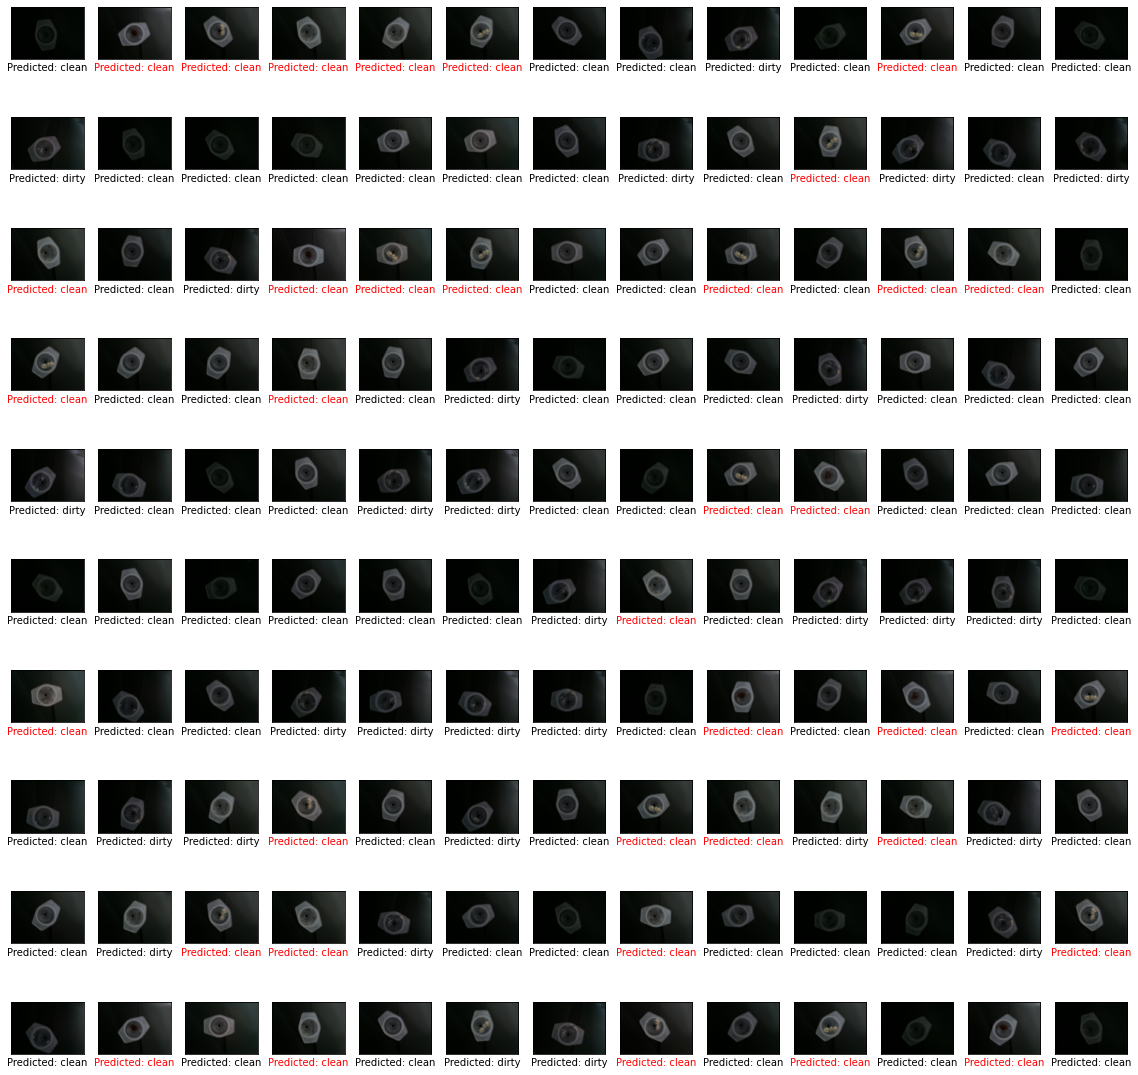

In [11]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(130)):
  ax = plt.subplot(10, 13, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

TypeError: ignored

In [9]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp0scee3ta/assets


INFO:tensorflow:Assets written to: /tmp/tmp0scee3ta/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpxo2v9cvh/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpxo2v9cvh/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite
